<a href="https://colab.research.google.com/github/niazstat/ElectionDataAnalysis/blob/main/12th_Elecetion_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  # Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
gold_folder_path = '/content/drive/MyDrive/Data/Gold'

# Read All Files and Store in Variables inside GOld FOlder

In [4]:
import os

files_in_gold_folder = os.listdir(gold_folder_path)

print(files_in_gold_folder)

['Seat_Names.xlsx', 'all_candidates.xlsx', 'polling_centeres.xlsx', 'cast_votes.xlsx']


In [5]:
df_seat_names = pd.read_excel(gold_folder_path+'/'+'Seat_Names.xlsx')
display(df_seat_names)

,আসন নং,নির্বাচনী আসন
0,1,পঞ্চগড়-১
1,2,পঞ্চগড়-২
2,3,ঠাকুরগাঁও-১
3,4,ঠাকুরগাঁও-২
4,5,ঠাকুরগাঁও-৩
...,...,...
293,296,কক্সবাজার-৩
294,297,কক্সবাজার-৪
295,298,খাগড়াছড়ি
296,299,রাঙ্গামাটি


In [6]:
df_all_candidates = pd.read_excel(gold_folder_path+'/'+'all_candidates.xlsx')
display(df_all_candidates)

,আসন নং,প্রার্থী নং,প্রার্থীর নাম,প্রতীক
0,1,1,মোঃ আনোয়ার সাদাত,ট্রাক
1,1,2,মোঃ আব্দুল ওয়াদুদ (বাদশা),একতারা
2,1,3,মোঃ আব্দুল মজিদ,ছড়ি
3,1,4,মোঃ নাঈমুজ্জামান ভুইয়াঁ,নৌকা
4,1,5,মোঃ মসিউর রহমান বাবুল,আম
...,...,...,...,...
1958,300,1,এ.টি. এম. শহীদুল ইসলাম,লাঙ্গল
1959,300,2,বীর বাহাদুর উ শৈ সিং,নৌকা
1960,299,1,অমর কুমার দে,ছড়ি
1961,299,2,দীপংকর তালুকদার,নৌকা


In [7]:
df_distinct_candidates = df_all_candidates[
    ['আসন নং', 'প্রার্থী নং']
].drop_duplicates().reset_index(drop=True)

print(df_distinct_candidates.count())

আসন নং         1963
প্রার্থী নং    1963
dtype: int64


In [8]:
df_polling_centres = pd.read_excel(gold_folder_path+'/'+'polling_centeres.xlsx')
display(df_polling_centres)

,আসন নং,কেন্দ্র নং,কেন্দ্র,মোট ভোটার,মোট বৈধ,মোট বাতিল,প্রদত্ত ভোট,শতকরা হার
0,1,1,"বাংলাবান্ধা সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3697,2352,61,2413,65.27
1,1,2,"সিপাইপাড়া সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3205,1580,48,1628,50.80
2,1,3,"ফুটকিবাড়ী সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1770,838,0,838,47.34
3,1,4,"গোয়ালগছ সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3487,2279,42,2321,66.56
4,1,5,"রওশনপুর সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3047,1547,45,1592,52.25
...,...,...,...,...,...,...,...,...
41903,299,209,"ফারুয়া সরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",3330,1943,21,1964,58.98
41904,299,210,"তারাছড়ি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",2097,1151,23,1174,55.98
41905,299,211,"রাইমংছড়া পাড়া বে-সরকারী প্রাথমিক বিদ্যালয়, - (...",735,210,2,212,28.84
41906,299,212,"বড়থলি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",723,324,4,328,45.37


In [9]:
df_cast_votes = pd.read_excel(gold_folder_path+'/'+'cast_votes.xlsx')
display(df_cast_votes)

,আসন নং,কেন্দ্র নং,প্রার্থী নং,ভোট সংখ্যা
0,1,1,1,356
1,1,2,1,607
2,1,3,1,328
3,1,4,1,533
4,1,5,1,605
...,...,...,...,...
277774,299,209,3,47
277775,299,210,3,41
277776,299,211,3,1
277777,299,212,3,29


In [10]:
total_voters = df_polling_centres['মোট ভোটার'].sum()  # Total Voters
total_cast_vote = df_polling_centres['প্রদত্ত ভোট'].sum()   # Total votes received (প্রাপ্ত ভোট)
total_valid_vote = df_polling_centres['মোট বৈধ'].sum()   # # Total legal / valid votes (মোট বৈধ ভোট)
total_cancelled_vote = df_polling_centres['মোট বাতিল'].sum()   #  # Total illegal / cancelled votes

In [11]:
print("Election Summary (ভোটের সারসংক্ষেপ)")
print("----------------------------------")
print(f"Total Voters (মোট ভোটার)           : {total_voters}")
print(f"Votes Cast (প্রদত্ত ভোট)           : {total_cast_vote}")
print(f"Valid Votes (মোট বৈধ ভোট)          : {total_valid_vote}")
print(f"Cancelled Votes (মোট বাতিল ভোট)    : {total_cancelled_vote}")


Election Summary (ভোটের সারসংক্ষেপ)
----------------------------------
Total Voters (মোট ভোটার)           : 118983900
Votes Cast (প্রদত্ত ভোট)           : 49962918
Valid Votes (মোট বৈধ ভোট)          : 48974130
Cancelled Votes (মোট বাতিল ভোট)    : 988788


In [12]:
# Calculate percentages
voter_turnout_pct = (total_cast_vote / total_voters) * 100 if total_voters else 0
valid_vote_pct = (total_valid_vote / total_cast_vote) * 100 if total_cast_vote else 0
illegal_vote_pct = (total_cancelled_vote / total_cast_vote) * 100 if total_cast_vote else 0

# Print results (rounded to 2 decimals)
print(f"Voter Turnout: {voter_turnout_pct:.2f}%")
print(f"Valid Vote Percentage: {valid_vote_pct:.2f}%")
print(f"Illegal / Cancelled Vote Percentage: {illegal_vote_pct:.2f}%")


Voter Turnout: 41.99%
Valid Vote Percentage: 98.02%
Illegal / Cancelled Vote Percentage: 1.98%


# Symbol wise Vote Cast/Analysis

## join ***df_all_candidates*** with  ***df_cast_votes***
## Key /Joining Column  ***আসন নং***	and  ***প্রার্থী নং***

In [13]:
df_joined_candidate_castvote = pd.merge(
    df_all_candidates,
    df_cast_votes,
    how="left",
    on=["আসন নং", "প্রার্থী নং"]
)

df_joined_candidate_castvote['ভোট সংখ্যা'] = df_joined_candidate_castvote['ভোট সংখ্যা'].fillna(0)

display(df_joined_candidate_castvote)

,আসন নং,প্রার্থী নং,প্রার্থীর নাম,প্রতীক,কেন্দ্র নং,ভোট সংখ্যা
0,1,1,মোঃ আনোয়ার সাদাত,ট্রাক,1,356
1,1,1,মোঃ আনোয়ার সাদাত,ট্রাক,2,607
2,1,1,মোঃ আনোয়ার সাদাত,ট্রাক,3,328
3,1,1,মোঃ আনোয়ার সাদাত,ট্রাক,4,533
4,1,1,মোঃ আনোয়ার সাদাত,ট্রাক,5,605
...,...,...,...,...,...,...
277774,299,3,মোঃ মিজানুর রহমান,সোনালী আঁশ,209,47
277775,299,3,মোঃ মিজানুর রহমান,সোনালী আঁশ,210,41
277776,299,3,মোঃ মিজানুর রহমান,সোনালী আঁশ,211,1
277777,299,3,মোঃ মিজানুর রহমান,সোনালী আঁশ,212,29


In [14]:
Test_total_votes = df_joined_candidate_castvote['ভোট সংখ্যা'].sum()
print(f"Test Total Votes: {Test_total_votes}")



Test Total Votes: 48974130


In [15]:
df_symbol_dist = df_joined_candidate_castvote.groupby(['প্রতীক']).agg(
    total_votes=('ভোট সংখ্যা', 'sum')
).reset_index().sort_values(by='total_votes', ascending=False)


display(df_symbol_dist)

,প্রতীক,total_votes
27,নৌকা,32332536
2,ঈগল,5589353
19,ট্রাক,5163771
43,লাঙ্গল,2175238
7,কাঁচি,993611
11,কেটলি,675850
6,কলার ছড়ি,236472
28,ফুলকপি,167951
26,নোঙ্গর,157573
44,সোনালী আঁশ,139676


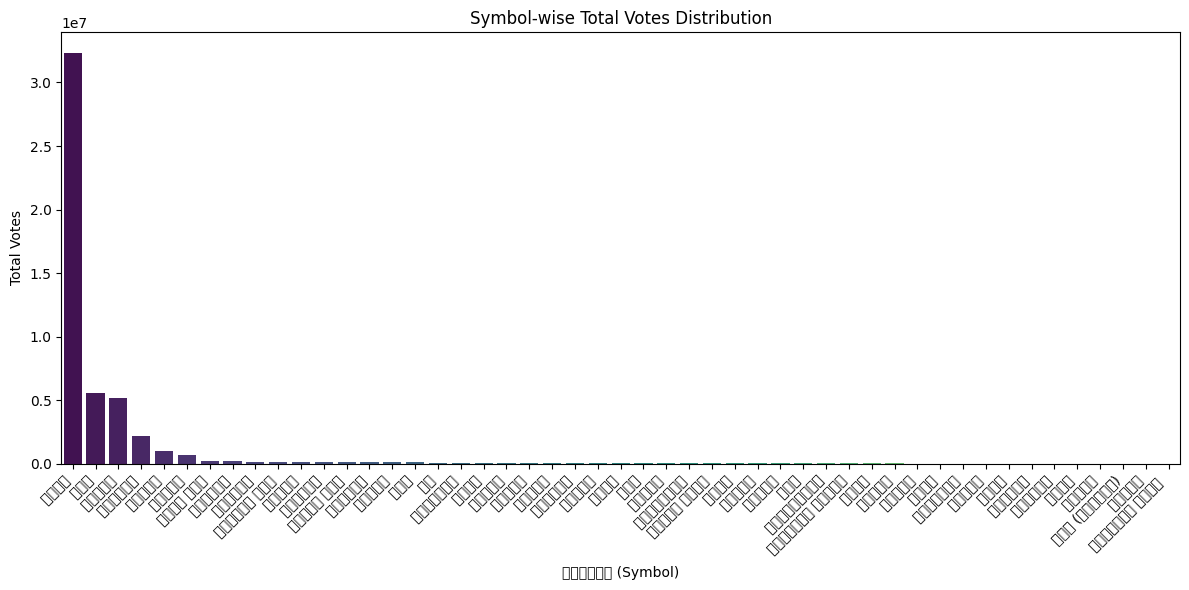

In [16]:

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,6))
sns.barplot(
    x='প্রতীক',
    y='total_votes',
    data=df_symbol_dist,
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('প্রতীক (Symbol)')
plt.ylabel('Total Votes')
plt.title('Symbol-wise Total Votes Distribution')
plt.tight_layout()
plt.show()

In [17]:



df_candidate_vote_dist = df_joined_candidate_castvote.groupby(['আসন নং','প্রার্থী নং']).agg(
    total_votes=('ভোট সংখ্যা', 'sum')
).reset_index().sort_values(by='total_votes', ascending=False)

display(df_candidate_vote_dist)

,আসন নং,প্রার্থী নং,total_votes
1402,216,6,295291
392,62,1,278971
880,140,1,276453
1959,299,2,271373
924,147,5,263431
...,...,...,...
813,129,8,46
1810,278,7,46
1431,222,5,46
919,146,7,44


In [18]:
print(df_candidate_vote_dist['total_votes'].max())

295291


##Create interval of Vote to do some analysis


In [19]:
bins = [0, 1000, 5000, 10000, 50000, 100000,200000,250000,300000]
labels = ['0-1000', '1001-5000', '5001-10000', '10001-50000', '50001-100000','100001-200000','200001-250000','250001-300000']
df_candidate_vote_dist['Vote_Range'] = pd.cut(df_candidate_vote_dist['total_votes'], bins=bins, labels=labels, right=False)

display(df_candidate_vote_dist)

,আসন নং,প্রার্থী নং,total_votes,Vote_Range
1402,216,6,295291,250001-300000
392,62,1,278971,250001-300000
880,140,1,276453,250001-300000
1959,299,2,271373,250001-300000
924,147,5,263431,250001-300000
...,...,...,...,...
813,129,8,46,0-1000
1810,278,7,46,0-1000
1431,222,5,46,0-1000
919,146,7,44,0-1000


In [20]:
interval_counts = df_candidate_vote_dist['Vote_Range'].value_counts().sort_index().reset_index()

display(interval_counts)

,Vote_Range,count
0,0-1000,946
1,1001-5000,380
2,5001-10000,83
3,10001-50000,165
4,50001-100000,224
5,100001-200000,138
6,200001-250000,22
7,250001-300000,5


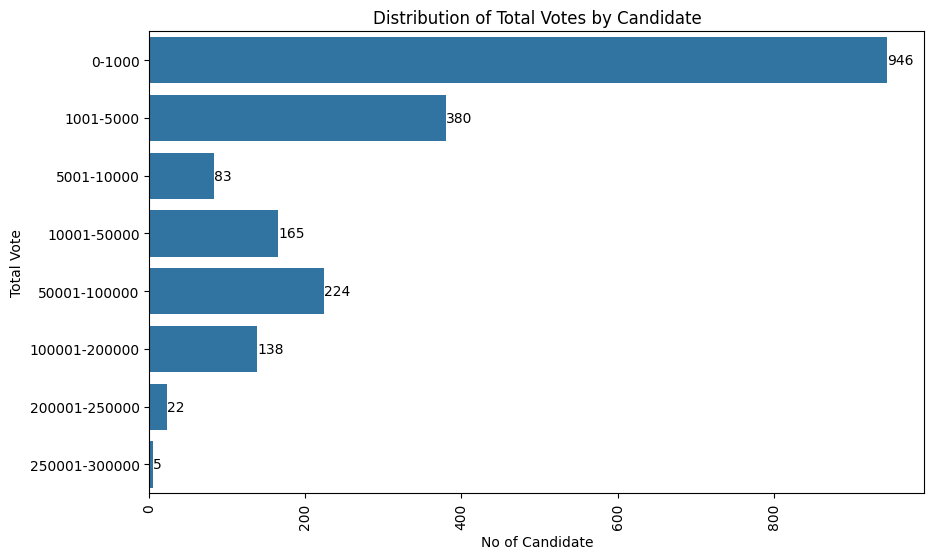

In [21]:
#interval_counts = all_party_cast_vote['Vote_Range'].value_counts().sort_index()

interval_counts.columns = ['intervals', 'count']
# Plotting the intervals
plt.figure(figsize=(10, 6))

ax=sns.barplot(x='count', y='intervals', data=interval_counts, orient='h')
plt.title('Distribution of Total Votes by Candidate')
plt.xlabel('No of Candidate')
plt.ylabel('Total Vote')
for index, value in enumerate(interval_counts['count']):
    ax.text(value, index, str(value), color='black', va='center')
plt.xticks(rotation=90)

plt.show()

#Center/Seat wise Analysis /Distribution

In [22]:
df_polling_centres_summary=df_polling_centres.groupby(['আসন নং'])[['মোট ভোটার','মোট বৈধ','মোট বাতিল','প্রদত্ত ভোট']].sum().reset_index()
df_polling_centres_summary['voter_turnout_pct'] = (
    df_polling_centres_summary['প্রদত্ত ভোট'] /
    df_polling_centres_summary['মোট ভোটার']
) * 100
df_polling_centres_summary['voter_turnout_pct'] .fillna(0)
display(df_polling_centres_summary)

,আসন নং,মোট ভোটার,মোট বৈধ,মোট বাতিল,প্রদত্ত ভোট,voter_turnout_pct
0,1,436923,186946,5633,192579,44.076187
1,2,389941,198242,9010,207252,53.149579
2,3,480604,230594,8250,238844,49.696632
3,4,317965,178286,3344,181630,57.122639
4,5,344354,173827,2399,176226,51.175825
...,...,...,...,...,...,...
293,296,489610,192117,3390,195507,39.931170
294,297,326971,157190,2953,160143,48.977738
295,298,515419,249796,7858,257654,49.989232
296,299,474454,279031,3746,282777,59.600509


In [23]:
print(df_polling_centres_summary['voter_turnout_pct'].max())

86.8934229427104


In [24]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [
    '0–10%',
    '10–20%',
    '20–30%',
    '30–40%',
    '40–50%',
    '50–60%',
    '60–70%',
    '70–80%',
    '80–90%',
    '90–100%'
]

df_polling_centres_summary['turnout_pct_range'] = pd.cut(
    df_polling_centres_summary['voter_turnout_pct'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False
)

display(df_polling_centres_summary)


,আসন নং,মোট ভোটার,মোট বৈধ,মোট বাতিল,প্রদত্ত ভোট,voter_turnout_pct,turnout_pct_range
0,1,436923,186946,5633,192579,44.076187,40–50%
1,2,389941,198242,9010,207252,53.149579,50–60%
2,3,480604,230594,8250,238844,49.696632,40–50%
3,4,317965,178286,3344,181630,57.122639,50–60%
4,5,344354,173827,2399,176226,51.175825,50–60%
...,...,...,...,...,...,...,...
293,296,489610,192117,3390,195507,39.931170,30–40%
294,297,326971,157190,2953,160143,48.977738,40–50%
295,298,515419,249796,7858,257654,49.989232,40–50%
296,299,474454,279031,3746,282777,59.600509,50–60%


In [25]:
interval_counts2 = df_polling_centres_summary['turnout_pct_range'].value_counts().sort_index().reset_index()

display(interval_counts2)

,turnout_pct_range,count
0,0–10%,0
1,10–20%,5
2,20–30%,47
3,30–40%,72
4,40–50%,94
5,50–60%,59
6,60–70%,16
7,70–80%,3
8,80–90%,2
9,90–100%,0


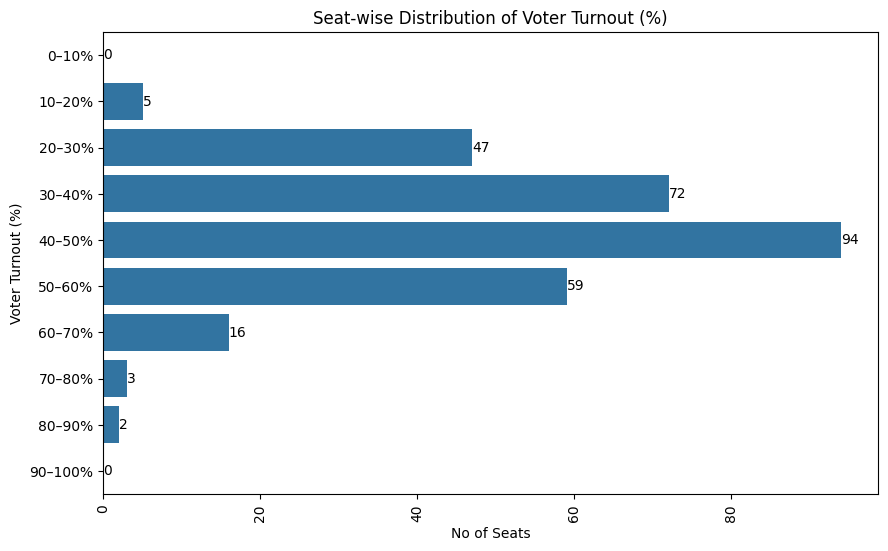

In [26]:
interval_counts2.columns = ['intervals', 'count']
# Plotting the intervals
plt.figure(figsize=(10, 6))

ax=sns.barplot(x='count', y='intervals', data=interval_counts2, orient='h')
plt.title('Seat-wise Distribution of Voter Turnout (%)')
plt.xlabel('No of Seats')
plt.ylabel('Voter Turnout (%)')
for index, value in enumerate(interval_counts2['count']):
    ax.text(value, index, str(value), color='black', va='center')
plt.xticks(rotation=90)

plt.show()

#Polling Center wise Analysis

In [42]:
df_polling_centres_summ= df_polling_centres


bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [
    '0–10%',
    '10–20%',
    '20–30%',
    '30–40%',
    '40–50%',
    '50–60%',
    '60–70%',
    '70–80%',
    '80–90%',
    '90–100%'
]

df_polling_centres_summ['turnout_pct_range'] = pd.cut(
    df_polling_centres_summ['শতকরা হার'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False
)

display(df_polling_centres_summ)




,আসন নং,কেন্দ্র নং,কেন্দ্র,মোট ভোটার,মোট বৈধ,মোট বাতিল,প্রদত্ত ভোট,শতকরা হার,turnout_pct_range
0,1,1,"বাংলাবান্ধা সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3697,2352,61,2413,65.27,60–70%
1,1,2,"সিপাইপাড়া সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3205,1580,48,1628,50.80,50–60%
2,1,3,"ফুটকিবাড়ী সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",1770,838,0,838,47.34,40–50%
3,1,4,"গোয়ালগছ সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3487,2279,42,2321,66.56,60–70%
4,1,5,"রওশনপুর সরকারী প্রাথমিক বিদ্যালয়, - (উভয়)",3047,1547,45,1592,52.25,50–60%
...,...,...,...,...,...,...,...,...,...
41903,299,209,"ফারুয়া সরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",3330,1943,21,1964,58.98,50–60%
41904,299,210,"তারাছড়ি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",2097,1151,23,1174,55.98,50–60%
41905,299,211,"রাইমংছড়া পাড়া বে-সরকারী প্রাথমিক বিদ্যালয়, - (...",735,210,2,212,28.84,20–30%
41906,299,212,"বড়থলি বেসরকারি প্রাথমিক বিদ্যালয়, - (উভয়)",723,324,4,328,45.37,40–50%


In [43]:
interval_counts3 = df_polling_centres_summ['turnout_pct_range'].value_counts().sort_index().reset_index()

display(interval_counts3)

,turnout_pct_range,count
0,0–10%,505
1,10–20%,3368
2,20–30%,6619
3,30–40%,8711
4,40–50%,9097
5,50–60%,6995
6,60–70%,4195
7,70–80%,1680
8,80–90%,638
9,90–100%,98


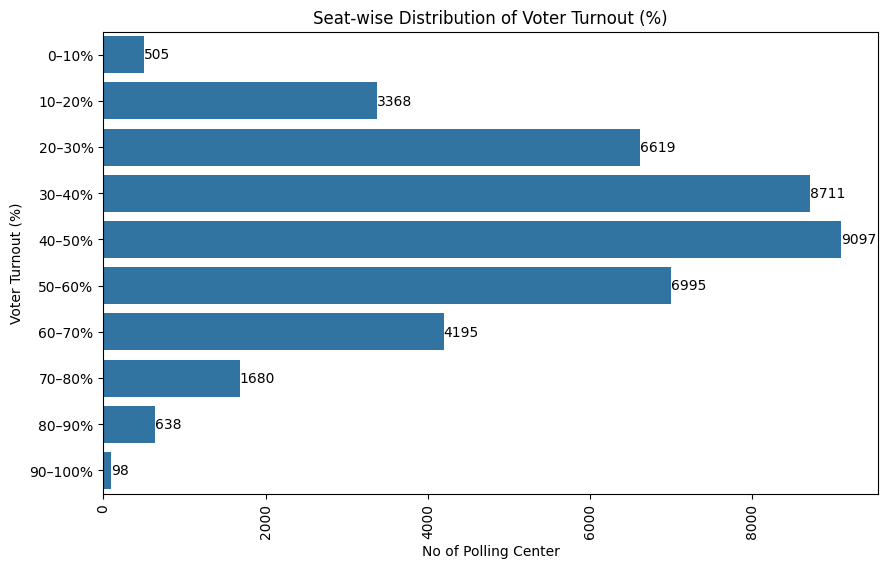

In [44]:
interval_counts3.columns = ['intervals', 'count']
# Plotting the intervals
plt.figure(figsize=(10, 6))

ax=sns.barplot(x='count', y='intervals', data=interval_counts3, orient='h')
plt.title('Seat-wise Distribution of Voter Turnout (%)')
plt.xlabel('No of Polling Center')
plt.ylabel('Voter Turnout (%)')
for index, value in enumerate(interval_counts3['count']):
    ax.text(value, index, str(value), color='black', va='center')
plt.xticks(rotation=90)

plt.show()

# **Find the list of all winners and runner-up candidates**

### for this we need to join 3 table ***df_seat_names*** join with ***df_all_candidates***  by column no *আসন নং*
## then join with ***df_cast_votes***  by Column no *আসন নং*  and ***প্রার্থী নং***

In [41]:
df_seat_candidate = pd.merge(
     df_seat_names,
    df_all_candidates,

    on='আসন নং',
    how='left'
)

df_Joined_final = pd.merge(
    df_seat_candidate,
    df_cast_votes,
    on=['আসন নং', 'প্রার্থী নং'],
    how='left'
)

display(df_Joined_final)



,আসন নং,নির্বাচনী আসন,প্রার্থী নং,প্রার্থীর নাম,প্রতীক,কেন্দ্র নং,ভোট সংখ্যা
0,1,পঞ্চগড়-১,1,মোঃ আনোয়ার সাদাত,ট্রাক,1,356
1,1,পঞ্চগড়-১,1,মোঃ আনোয়ার সাদাত,ট্রাক,2,607
2,1,পঞ্চগড়-১,1,মোঃ আনোয়ার সাদাত,ট্রাক,3,328
3,1,পঞ্চগড়-১,1,মোঃ আনোয়ার সাদাত,ট্রাক,4,533
4,1,পঞ্চগড়-১,1,মোঃ আনোয়ার সাদাত,ট্রাক,5,605
...,...,...,...,...,...,...,...
277774,300,বান্দারবান,2,বীর বাহাদুর উ শৈ সিং,নৌকা,178,554
277775,300,বান্দারবান,2,বীর বাহাদুর উ শৈ সিং,নৌকা,179,770
277776,300,বান্দারবান,2,বীর বাহাদুর উ শৈ সিং,নৌকা,180,636
277777,300,বান্দারবান,2,বীর বাহাদুর উ শৈ সিং,নৌকা,181,524


In [28]:
df_Joined_final_Summ=df_Joined_final.groupby(['আসন নং','নির্বাচনী আসন','প্রার্থী নং','প্রার্থীর নাম','প্রতীক'])[['ভোট সংখ্যা']].sum().reset_index()


display(df_Joined_final_Summ)

,আসন নং,নির্বাচনী আসন,প্রার্থী নং,প্রার্থীর নাম,প্রতীক,ভোট সংখ্যা
0,1,পঞ্চগড়-১,1,মোঃ আনোয়ার সাদাত,ট্রাক,57210
1,1,পঞ্চগড়-১,2,মোঃ আব্দুল ওয়াদুদ (বাদশা),একতারা,1371
2,1,পঞ্চগড়-১,3,মোঃ আব্দুল মজিদ,ছড়ি,743
3,1,পঞ্চগড়-১,4,মোঃ নাঈমুজ্জামান ভুইয়াঁ,নৌকা,124742
4,1,পঞ্চগড়-১,5,মোঃ মসিউর রহমান বাবুল,আম,1399
...,...,...,...,...,...,...
1958,299,রাঙ্গামাটি,1,অমর কুমার দে,ছড়ি,4965
1959,299,রাঙ্গামাটি,2,দীপংকর তালুকদার,নৌকা,271373
1960,299,রাঙ্গামাটি,3,মোঃ মিজানুর রহমান,সোনালী আঁশ,2693
1961,300,বান্দারবান,1,এ.টি. এম. শহীদুল ইসলাম,লাঙ্গল,10361


In [29]:
df_Joined_final_Summ_sorted= df_Joined_final_Summ.sort_values(by=['আসন নং', 'ভোট সংখ্যা'],ascending=[True, False])
display(df_Joined_final_Summ_sorted)

,আসন নং,নির্বাচনী আসন,প্রার্থী নং,প্রার্থীর নাম,প্রতীক,ভোট সংখ্যা
3,1,পঞ্চগড়-১,4,মোঃ নাঈমুজ্জামান ভুইয়াঁ,নৌকা,124742
0,1,পঞ্চগড়-১,1,মোঃ আনোয়ার সাদাত,ট্রাক,57210
5,1,পঞ্চগড়-১,6,মোঃ সিরাজুল ইসলাম,টেলিভিশন,1481
4,1,পঞ্চগড়-১,5,মোঃ মসিউর রহমান বাবুল,আম,1399
1,1,পঞ্চগড়-১,2,মোঃ আব্দুল ওয়াদুদ (বাদশা),একতারা,1371
...,...,...,...,...,...,...
1959,299,রাঙ্গামাটি,2,দীপংকর তালুকদার,নৌকা,271373
1958,299,রাঙ্গামাটি,1,অমর কুমার দে,ছড়ি,4965
1960,299,রাঙ্গামাটি,3,মোঃ মিজানুর রহমান,সোনালী আঁশ,2693
1962,300,বান্দারবান,2,বীর বাহাদুর উ শৈ সিং,নৌকা,172671


In [30]:
df_result_winner = df_Joined_final_Summ_sorted.groupby(['আসন নং']).head(1).reset_index(drop=True)
display(df_result_winner)

,আসন নং,নির্বাচনী আসন,প্রার্থী নং,প্রার্থীর নাম,প্রতীক,ভোট সংখ্যা
0,1,পঞ্চগড়-১,4,মোঃ নাঈমুজ্জামান ভুইয়াঁ,নৌকা,124742
1,2,পঞ্চগড়-২,3,মোঃ নূরুল ইসলাম সুজন,নৌকা,181725
2,3,ঠাকুরগাঁও-১,5,রমেশ চন্দ্র সেন,নৌকা,205313
3,4,ঠাকুরগাঁও-২,5,মোঃ মাজহারুল ইসলাম,নৌকা,115416
4,5,ঠাকুরগাঁও-৩,4,হাফিজ উদ্দিন আহম্মেদ,লাঙ্গল,106714
...,...,...,...,...,...,...
293,296,কক্সবাজার-৩,6,সাইমুম সরওয়ার কমল,নৌকা,167039
294,297,কক্সবাজার-৪,7,শাহীন আক্তার,নৌকা,122080
295,298,খাগড়াছড়ি,2,কুজেন্দ্র লাল ত্রিপুরা,নৌকা,220876
296,299,রাঙ্গামাটি,2,দীপংকর তালুকদার,নৌকা,271373


In [31]:
df_result_runnerup = df_Joined_final_Summ_sorted.groupby('আসন নং').nth(1).reset_index()
display(df_result_runnerup)

,index,আসন নং,নির্বাচনী আসন,প্রার্থী নং,প্রার্থীর নাম,প্রতীক,ভোট সংখ্যা
0,0,1,পঞ্চগড়-১,1,মোঃ আনোয়ার সাদাত,ট্রাক,57210
1,9,2,পঞ্চগড়-২,4,মোঃ লুৎফর রহমান রিপন,লাঙ্গল,7627
2,13,3,ঠাকুরগাঁও-১,4,মোঃ রেজাউর রাজী,লাঙ্গল,13940
3,18,4,ঠাকুরগাঁও-২,4,মোঃ আলী আসলাম,ট্রাক,57245
4,21,5,ঠাকুরগাঁও-৩,2,গোপাল চন্দ্র রায়,হাতুড়ী,64821
...,...,...,...,...,...,...,...
293,1942,296,কক্সবাজার-৩,2,মিজান সাঈদ,ঈগল,21946
294,1952,297,কক্সবাজার-৪,6,মোঃ নুরুল বশর,ঈগল,31707
295,1956,298,খাগড়াছড়ি,3,মিথিলা রোয়াজা,লাঙ্গল,10938
296,1958,299,রাঙ্গামাটি,1,অমর কুমার দে,ছড়ি,4965


In [32]:
df_winner_runner = pd.merge(
    df_result_winner,
    df_result_runnerup,
    on='আসন নং',
    how='inner',
    suffixes=('_winner', '_runner_up')
)



display(df_winner_runner)

,আসন নং,নির্বাচনী আসন_winner,প্রার্থী নং_winner,প্রার্থীর নাম_winner,প্রতীক_winner,ভোট সংখ্যা_winner,index,নির্বাচনী আসন_runner_up,প্রার্থী নং_runner_up,প্রার্থীর নাম_runner_up,প্রতীক_runner_up,ভোট সংখ্যা_runner_up
0,1,পঞ্চগড়-১,4,মোঃ নাঈমুজ্জামান ভুইয়াঁ,নৌকা,124742,0,পঞ্চগড়-১,1,মোঃ আনোয়ার সাদাত,ট্রাক,57210
1,2,পঞ্চগড়-২,3,মোঃ নূরুল ইসলাম সুজন,নৌকা,181725,9,পঞ্চগড়-২,4,মোঃ লুৎফর রহমান রিপন,লাঙ্গল,7627
2,3,ঠাকুরগাঁও-১,5,রমেশ চন্দ্র সেন,নৌকা,205313,13,ঠাকুরগাঁও-১,4,মোঃ রেজাউর রাজী,লাঙ্গল,13940
3,4,ঠাকুরগাঁও-২,5,মোঃ মাজহারুল ইসলাম,নৌকা,115416,18,ঠাকুরগাঁও-২,4,মোঃ আলী আসলাম,ট্রাক,57245
4,5,ঠাকুরগাঁও-৩,4,হাফিজ উদ্দিন আহম্মেদ,লাঙ্গল,106714,21,ঠাকুরগাঁও-৩,2,গোপাল চন্দ্র রায়,হাতুড়ী,64821
...,...,...,...,...,...,...,...,...,...,...,...,...
293,296,কক্সবাজার-৩,6,সাইমুম সরওয়ার কমল,নৌকা,167039,1942,কক্সবাজার-৩,2,মিজান সাঈদ,ঈগল,21946
294,297,কক্সবাজার-৪,7,শাহীন আক্তার,নৌকা,122080,1952,কক্সবাজার-৪,6,মোঃ নুরুল বশর,ঈগল,31707
295,298,খাগড়াছড়ি,2,কুজেন্দ্র লাল ত্রিপুরা,নৌকা,220876,1956,খাগড়াছড়ি,3,মিথিলা রোয়াজা,লাঙ্গল,10938
296,299,রাঙ্গামাটি,2,দীপংকর তালুকদার,নৌকা,271373,1958,রাঙ্গামাটি,1,অমর কুমার দে,ছড়ি,4965


In [33]:
df_winner_runner['winning_margin'] = (
    df_winner_runner['ভোট সংখ্যা_winner']
    - df_winner_runner['ভোট সংখ্যা_runner_up']
)
df_winner_runner = df_winner_runner[[
    'আসন নং','নির্বাচনী আসন_winner',
    'প্রার্থীর নাম_winner', 'প্রতীক_winner', 'ভোট সংখ্যা_winner',
    'প্রার্থীর নাম_runner_up', 'প্রতীক_runner_up', 'ভোট সংখ্যা_runner_up',
    'winning_margin'
]]

display(df_winner_runner)

,আসন নং,নির্বাচনী আসন_winner,প্রার্থীর নাম_winner,প্রতীক_winner,ভোট সংখ্যা_winner,প্রার্থীর নাম_runner_up,প্রতীক_runner_up,ভোট সংখ্যা_runner_up,winning_margin
0,1,পঞ্চগড়-১,মোঃ নাঈমুজ্জামান ভুইয়াঁ,নৌকা,124742,মোঃ আনোয়ার সাদাত,ট্রাক,57210,67532
1,2,পঞ্চগড়-২,মোঃ নূরুল ইসলাম সুজন,নৌকা,181725,মোঃ লুৎফর রহমান রিপন,লাঙ্গল,7627,174098
2,3,ঠাকুরগাঁও-১,রমেশ চন্দ্র সেন,নৌকা,205313,মোঃ রেজাউর রাজী,লাঙ্গল,13940,191373
3,4,ঠাকুরগাঁও-২,মোঃ মাজহারুল ইসলাম,নৌকা,115416,মোঃ আলী আসলাম,ট্রাক,57245,58171
4,5,ঠাকুরগাঁও-৩,হাফিজ উদ্দিন আহম্মেদ,লাঙ্গল,106714,গোপাল চন্দ্র রায়,হাতুড়ী,64821,41893
...,...,...,...,...,...,...,...,...,...
293,296,কক্সবাজার-৩,সাইমুম সরওয়ার কমল,নৌকা,167039,মিজান সাঈদ,ঈগল,21946,145093
294,297,কক্সবাজার-৪,শাহীন আক্তার,নৌকা,122080,মোঃ নুরুল বশর,ঈগল,31707,90373
295,298,খাগড়াছড়ি,কুজেন্দ্র লাল ত্রিপুরা,নৌকা,220876,মিথিলা রোয়াজা,লাঙ্গল,10938,209938
296,299,রাঙ্গামাটি,দীপংকর তালুকদার,নৌকা,271373,অমর কুমার দে,ছড়ি,4965,266408


In [34]:
# Assuming df_winner_runner is the merged table of winners and runners-up
symbol_count = df_winner_runner.groupby('প্রতীক_winner').size().reset_index(name='candidate_count')

# Sort descending for better visualization
symbol_count = symbol_count.sort_values('candidate_count', ascending=False)

display(symbol_count)



,প্রতীক_winner,candidate_count
6,নৌকা,224
4,ট্রাক,25
0,ঈগল,23
7,লাঙ্গল,11
2,কাঁচি,5
3,কেটলি,5
1,কলার ছড়ি,3
5,ঢেঁকি,1
8,হাতঘড়ি,1


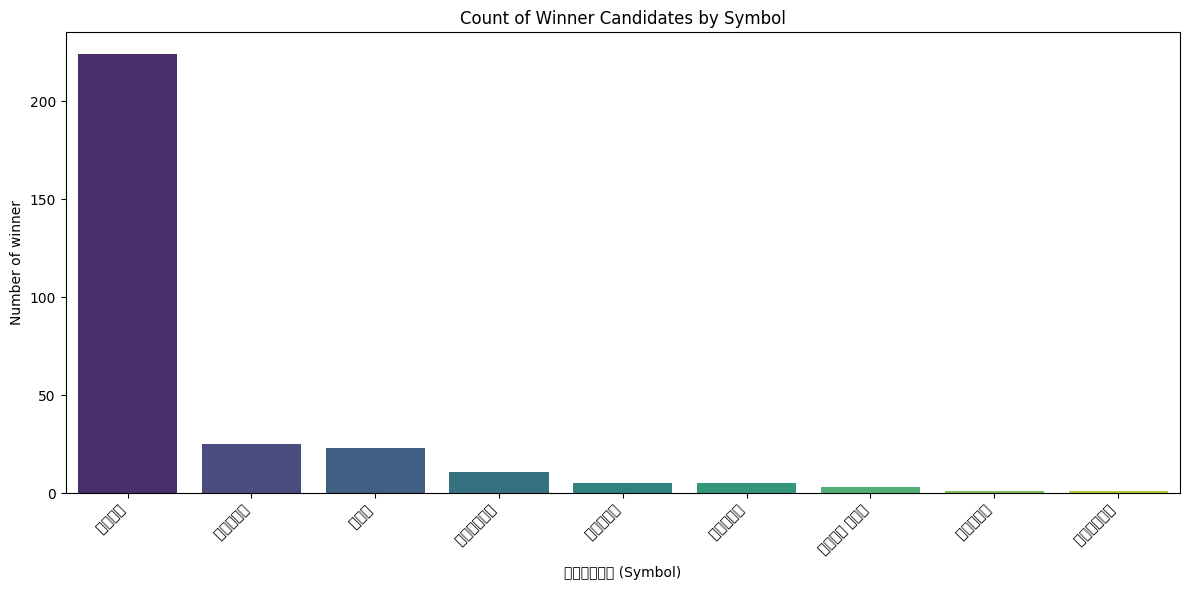

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    x='প্রতীক_winner',
    y='candidate_count',
    data=symbol_count,
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('প্রতীক (Symbol)')
plt.ylabel('Number of winner')
plt.title('Count of Winner Candidates by Symbol')
plt.tight_layout()
plt.show()


plt.title('Distribution of Turnout Across All Polling Centers')
plt.title('Distribution of the Percentage Difference in Votes Between the Winner and Runner-up')